In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm, kde
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("seaborn")

from plotnine.data import mpg
from plotnine import ggplot, aes, geom_point, geom_bar, geom_boxplot, geom_hline, facet_grid, labs, geom_point, geom_col, stat_count, geom_histogram, stat_density, coord_flip
from plotnine import scale_x_continuous, scale_y_continuous, scale_colour_discrete, scale_x_reverse, scale_y_reverse, scale_color_manual, scale_color_brewer, scale_x_discrete, scale_fill_manual
from plotnine import theme_xkcd, theme_classic, theme_light, theme, element_blank
from plotnine import geom_text, position_stack

from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns

import plotly
import plotly.graph_objects as go
import plotly.express as px

from scipy import stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [2]:
# Lee archivo
url1 = "https://raw.githubusercontent.com/FoxuF/DataDataData/main/MetaCriticScrap/Video_Games_Sales_as_at_22_Dec_2016.csv"
#https://www.kaggle.com/code/snanilim/video-games-sales-analysis-and-visualization/notebook#10.-Sales-compearison-by-genre
url2 = "https://raw.githubusercontent.com/FoxuF/DataDataData/main/MetaCriticScrap/games-data.csv"

url3 = "https://raw.githubusercontent.com/FoxuF/DataDataData/main/MetaCriticScrap/steam.csv"
dfSales = pd.read_csv(url1)
dfGD = pd.read_csv(url2)
df = pd.read_csv(url3)

#  Data Science dfSales :)

In [7]:
dfSales

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
dfSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

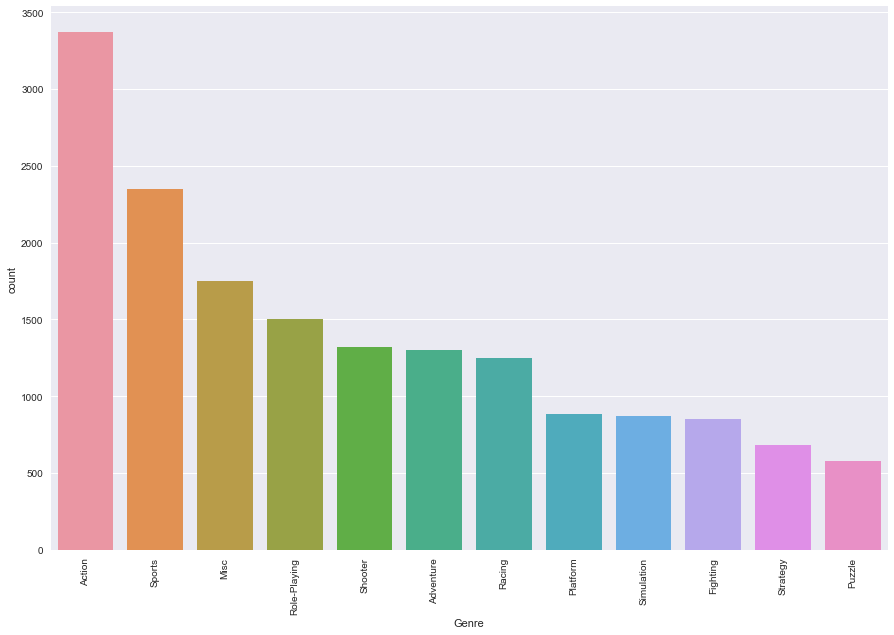

In [4]:
#¿What genre games have been made the most?
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=dfSales, order = dfSales['Genre'].value_counts().index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '2008.0'),
  Text(1, 0, '2009.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2016.0'),
  Text(15, 0, '2001.0'),
  Text(16, 0, '1998.0'),
  Text(17, 0, '2000.0'),
  Text(18, 0, '1999.0'),
  Text(19, 0, '1997.0'),
  Text(20, 0, '1996.0'),
  Text(21, 0, '1995.0'),
  Text(22, 0, '1994.0'),
  Text(23, 0, '1993.0'),
  Text(24, 0, '1981.0'),
  Text(25, 0, '1992.0'),
  Text(26, 0, '1991.0'),
  Text(27, 0, '1982.0'),
  Text(28, 0, '1986.0'),
  Text(29, 0, '1989.0'),
  Text(30, 0, '1983.0'),
  Text(31, 0, '1987.0'),
  Text(32, 0, '1990.0'),
  T

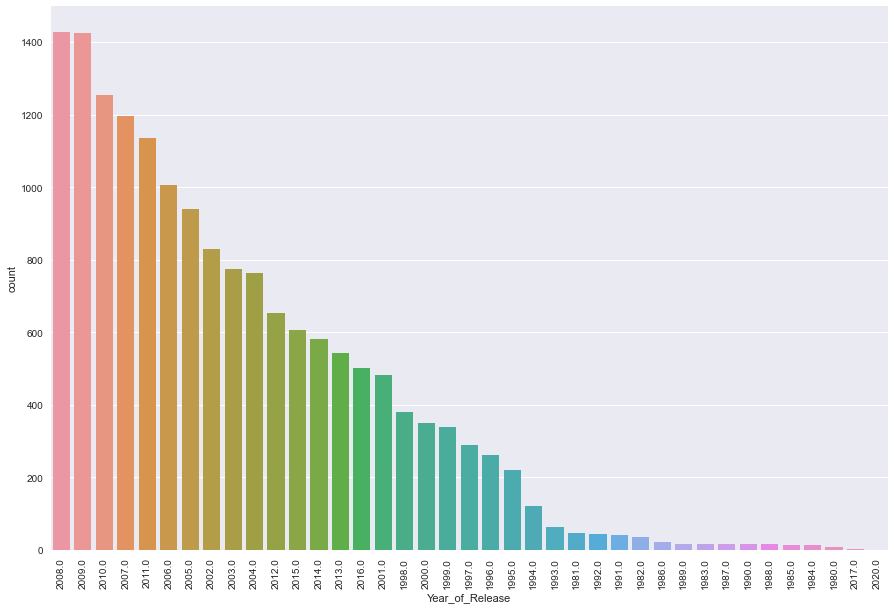

In [14]:
#¿Which year had the most game release?
plt.figure(figsize=(15, 10))
sns.countplot(x="Year_of_Release", data=dfSales, order = dfSales.groupby(by=['Year_of_Release'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2008.0'),
  Text(1, 0, '2009.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0')])

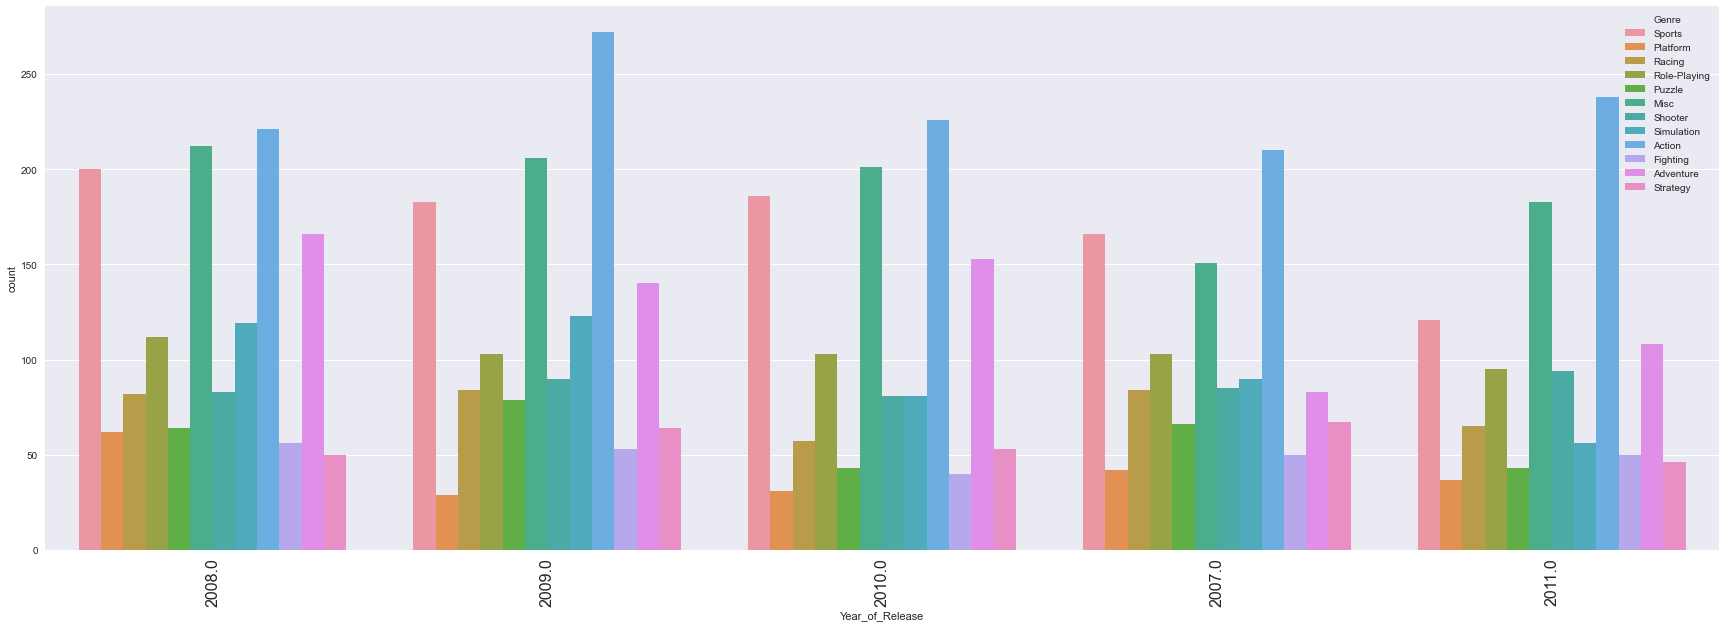

In [16]:
#Top 5 years games release by genre.
plt.figure(figsize=(30, 10))
sns.countplot(x="Year_of_Release", data=dfSales, hue='Genre', order=dfSales.Year_of_Release.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  T

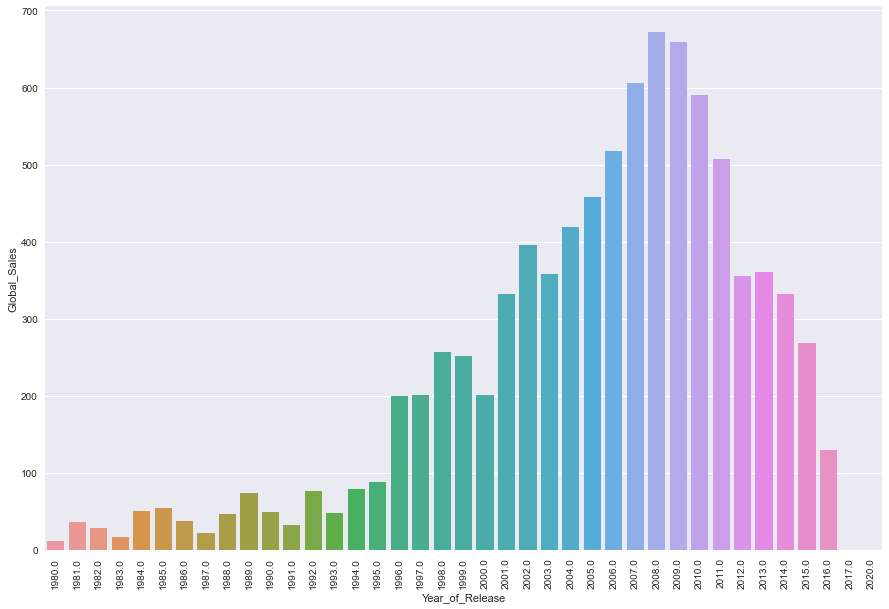

In [18]:
#¿Which year had the highest sales worldwide?
data_year = dfSales.groupby(by=['Year_of_Release'])['Global_Sales'].sum()
data_year = data_year.reset_index()
# data_year.sort_values(by=['Global_Sales'], ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x="Year_of_Release", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)

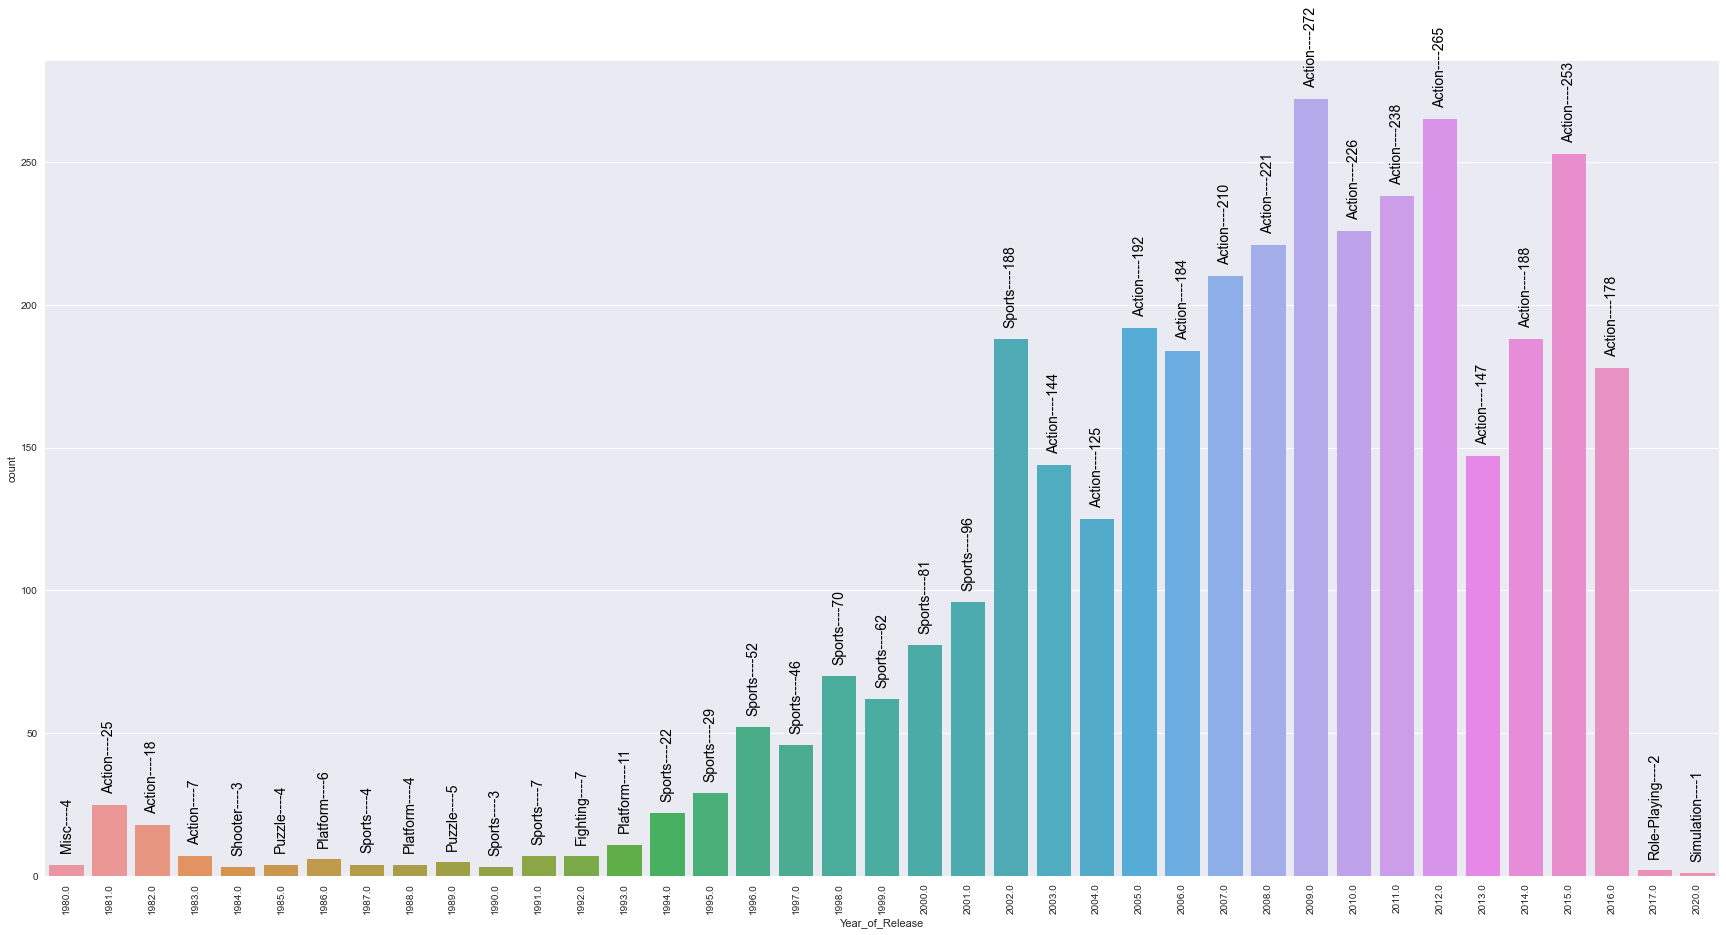

In [19]:
#¿Which genre game has been released the most in a single year?
year_max_df = dfSales.groupby(['Year_of_Release', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year_of_Release'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year_of_Release", "count"], keep='last').reset_index(drop=True)
# year_max_genre
genre = year_max_genre['Genre'].values
# genre[0]
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year_of_Release', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
#     print(asd)
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1
    
plt.xticks(rotation=90)
plt.show()

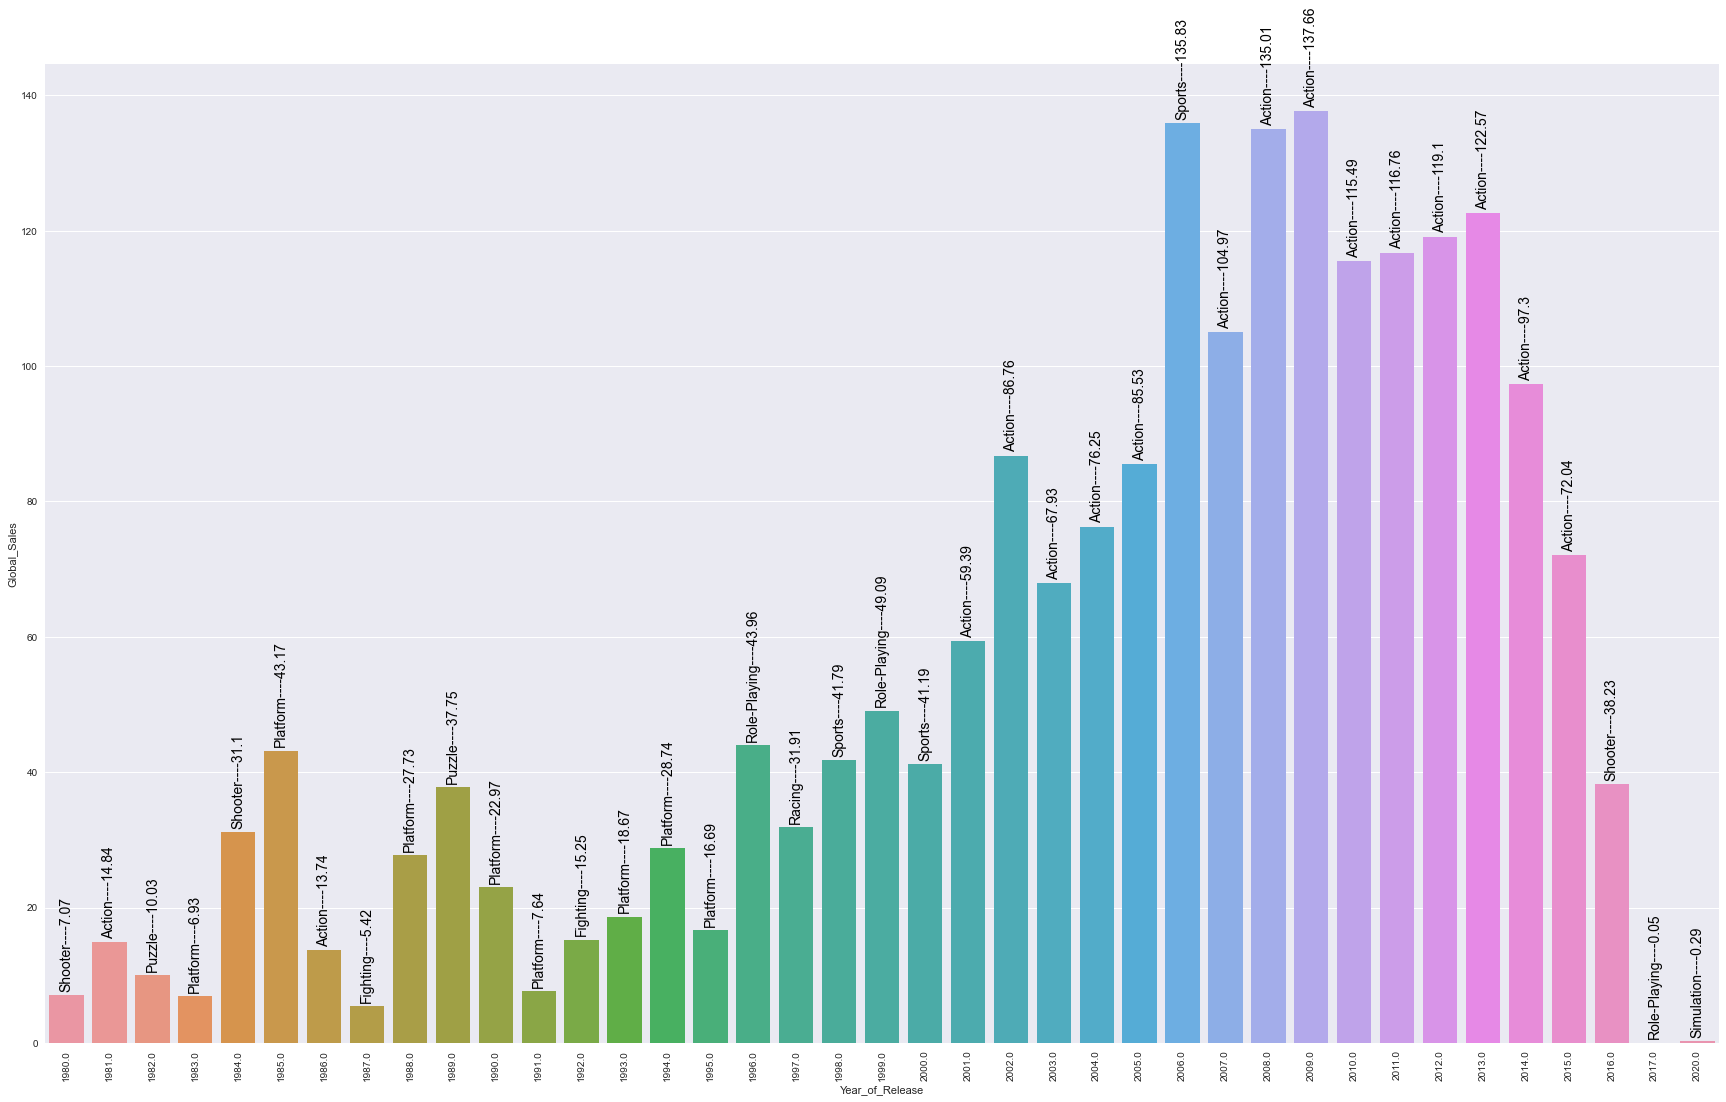

In [21]:
#¿Which genre game has sold the most in a single year?
year_sale_dx = dfSales.groupby(by=['Year_of_Release', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year_of_Release'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
# year_sale_max
genre = year_sale_max['Genre']
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year_of_Release', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

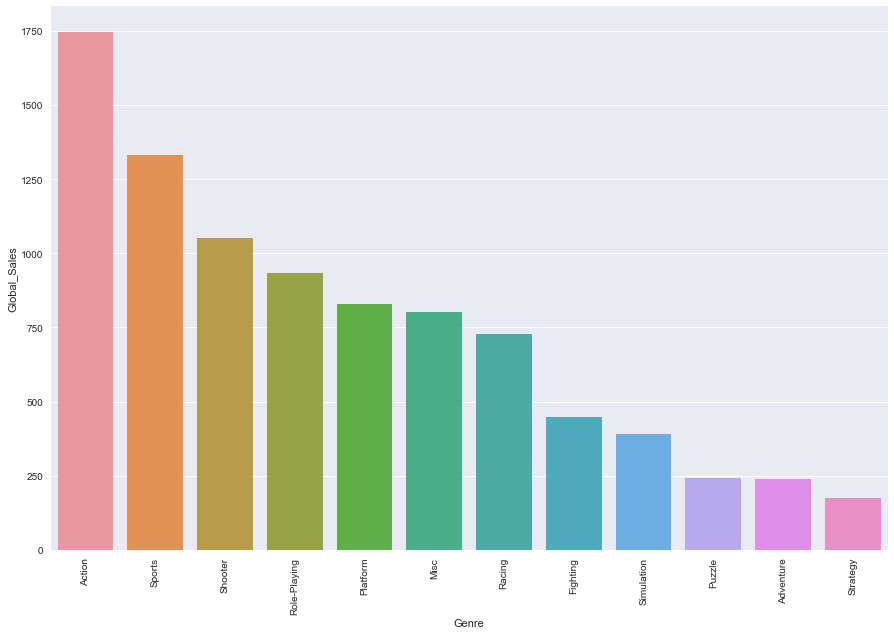

In [22]:
#¿Which genre game have the highest sale price globally? 
data_genre = dfSales.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
# data_genre
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)

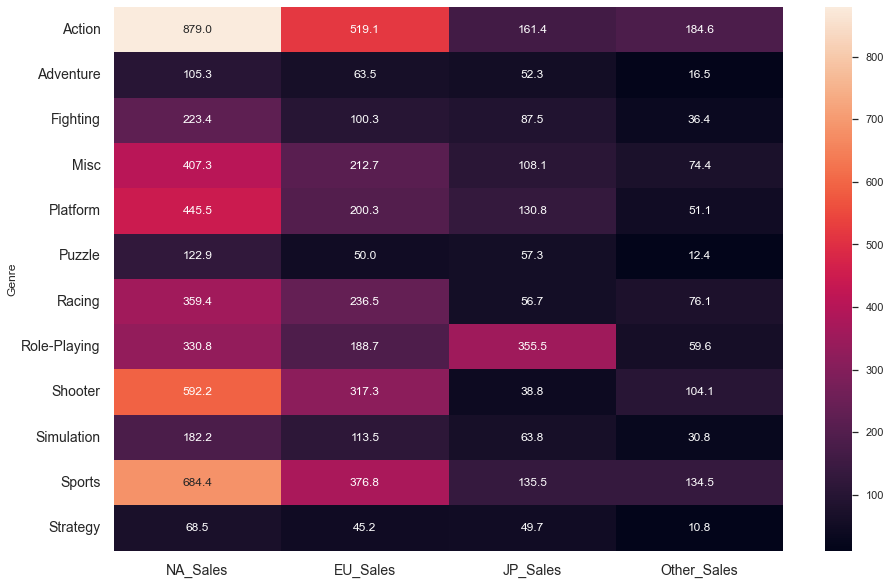

In [23]:
#Sales comparison by genre
comp_genre = dfSales[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

([<matplotlib.patches.Wedge at 0x1afc12ce190>,
 [Text(-1.0997903563186415, 0.021474919057257354, 'NA_Sales'),
  Text(0.80071670769775, -0.7542232786209109, 'EU_Sales'),
  Text(0.9343201814851579, 0.5805564558848189, 'JP_Sales'),
  Text(0.3027548547310551, 1.0575157199478304, 'Other_Sales')],
 [Text(-0.5998856489010771, 0.011713592213049464, '49.4%'),
  Text(0.43675456783513633, -0.4113945156114059, '27.2%'),
  Text(0.5096291899009951, 0.3166671577553557, '14.6%'),
  Text(0.1651390116714846, 0.5768267563351801, '8.9%')])

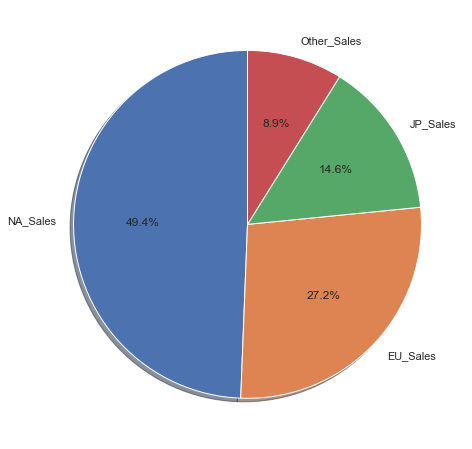

In [27]:
top_sale_reg = dfSales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
C:\Users\Usuario\anaconda3\lib\site-p

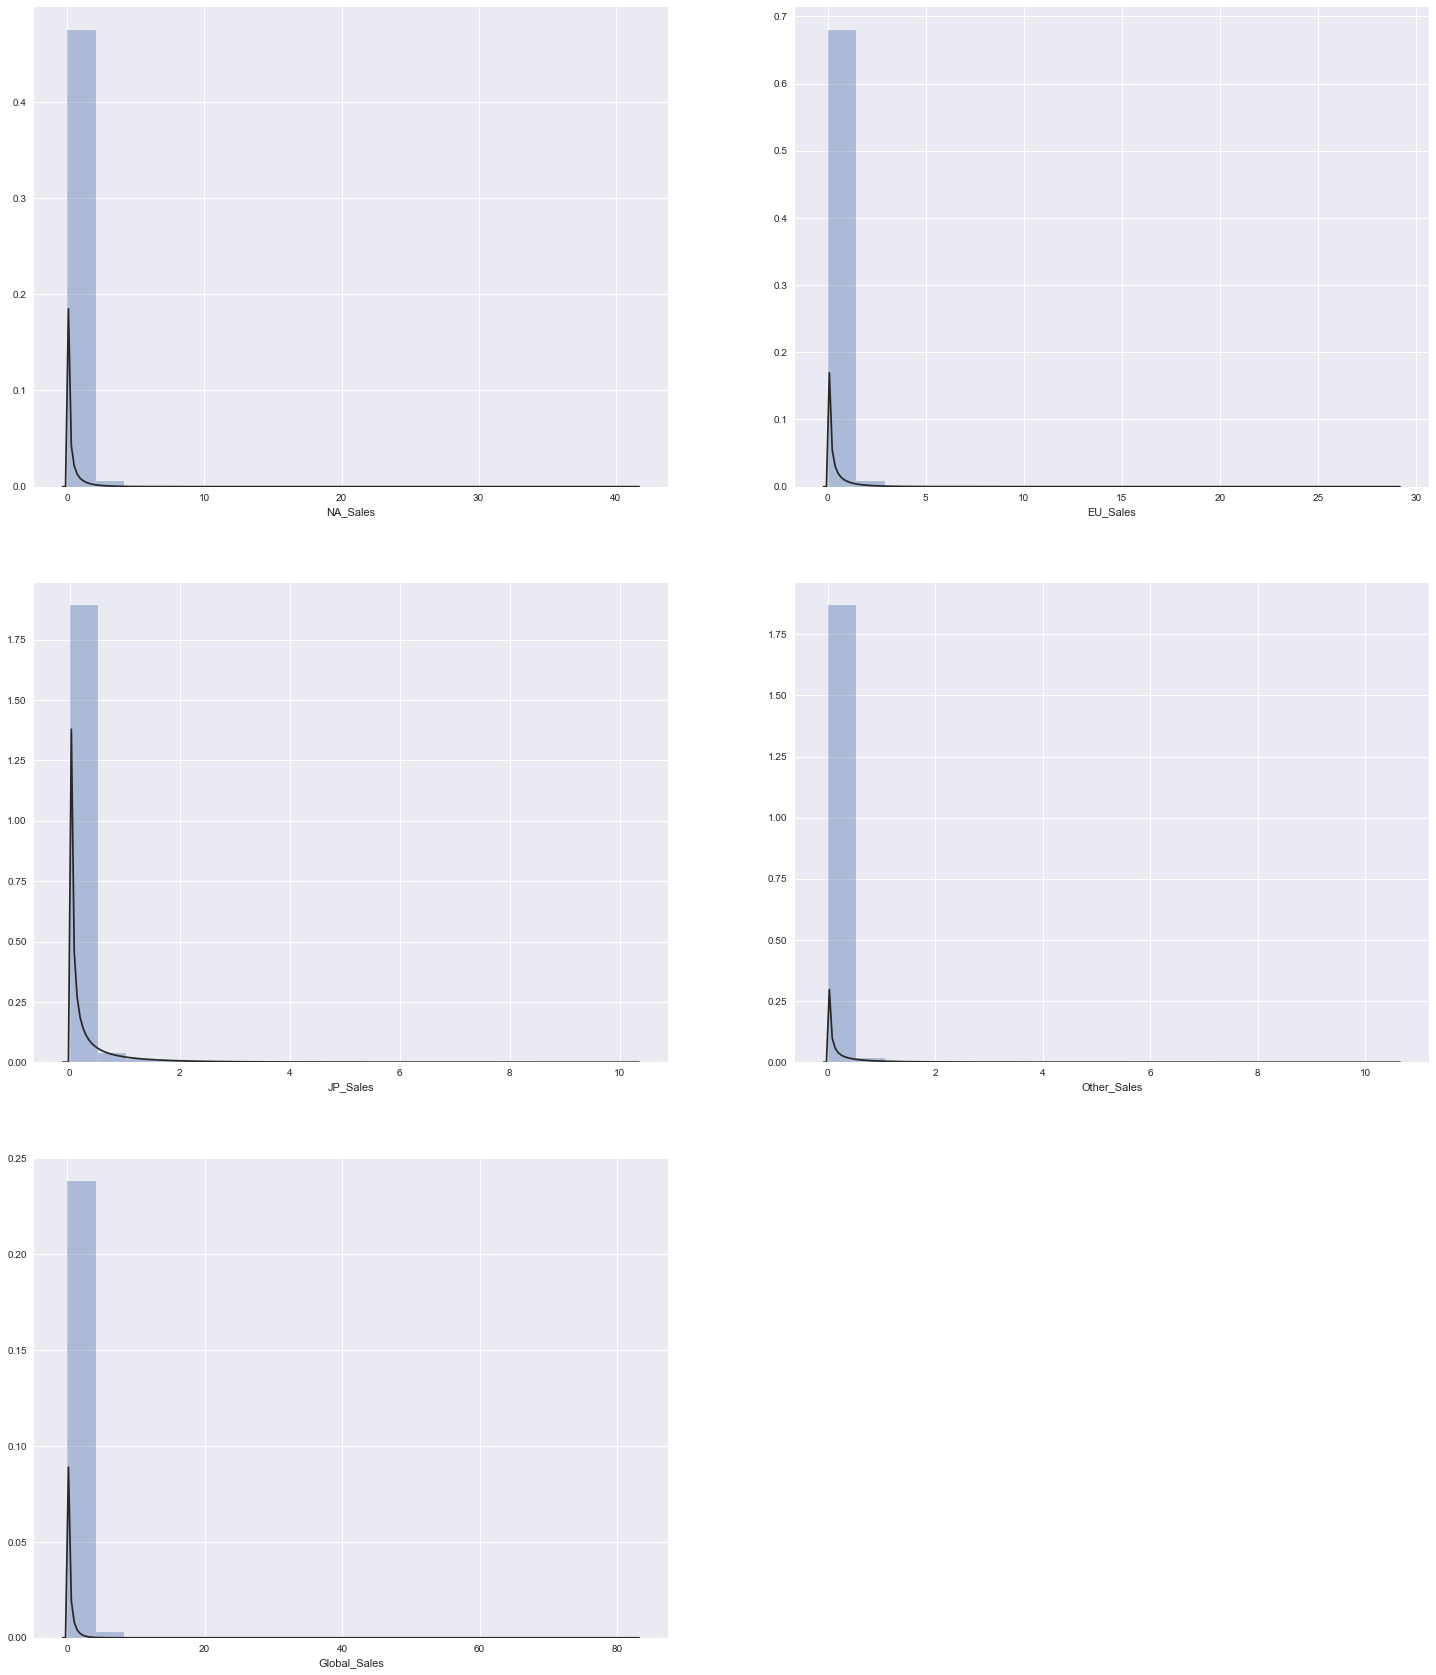

In [33]:
#Histograms
# sns.distplot(data['NA_Sales'],  kde=False, fit=stats.gamma);
# sns.distplot(data['EU_Sales'],  kde=False, fit=stats.gamma);
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(dfSales[column], bins=20, kde=False, fit=stats.gamma)

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
C:\Users\Usuario\anaconda3\lib\site-p

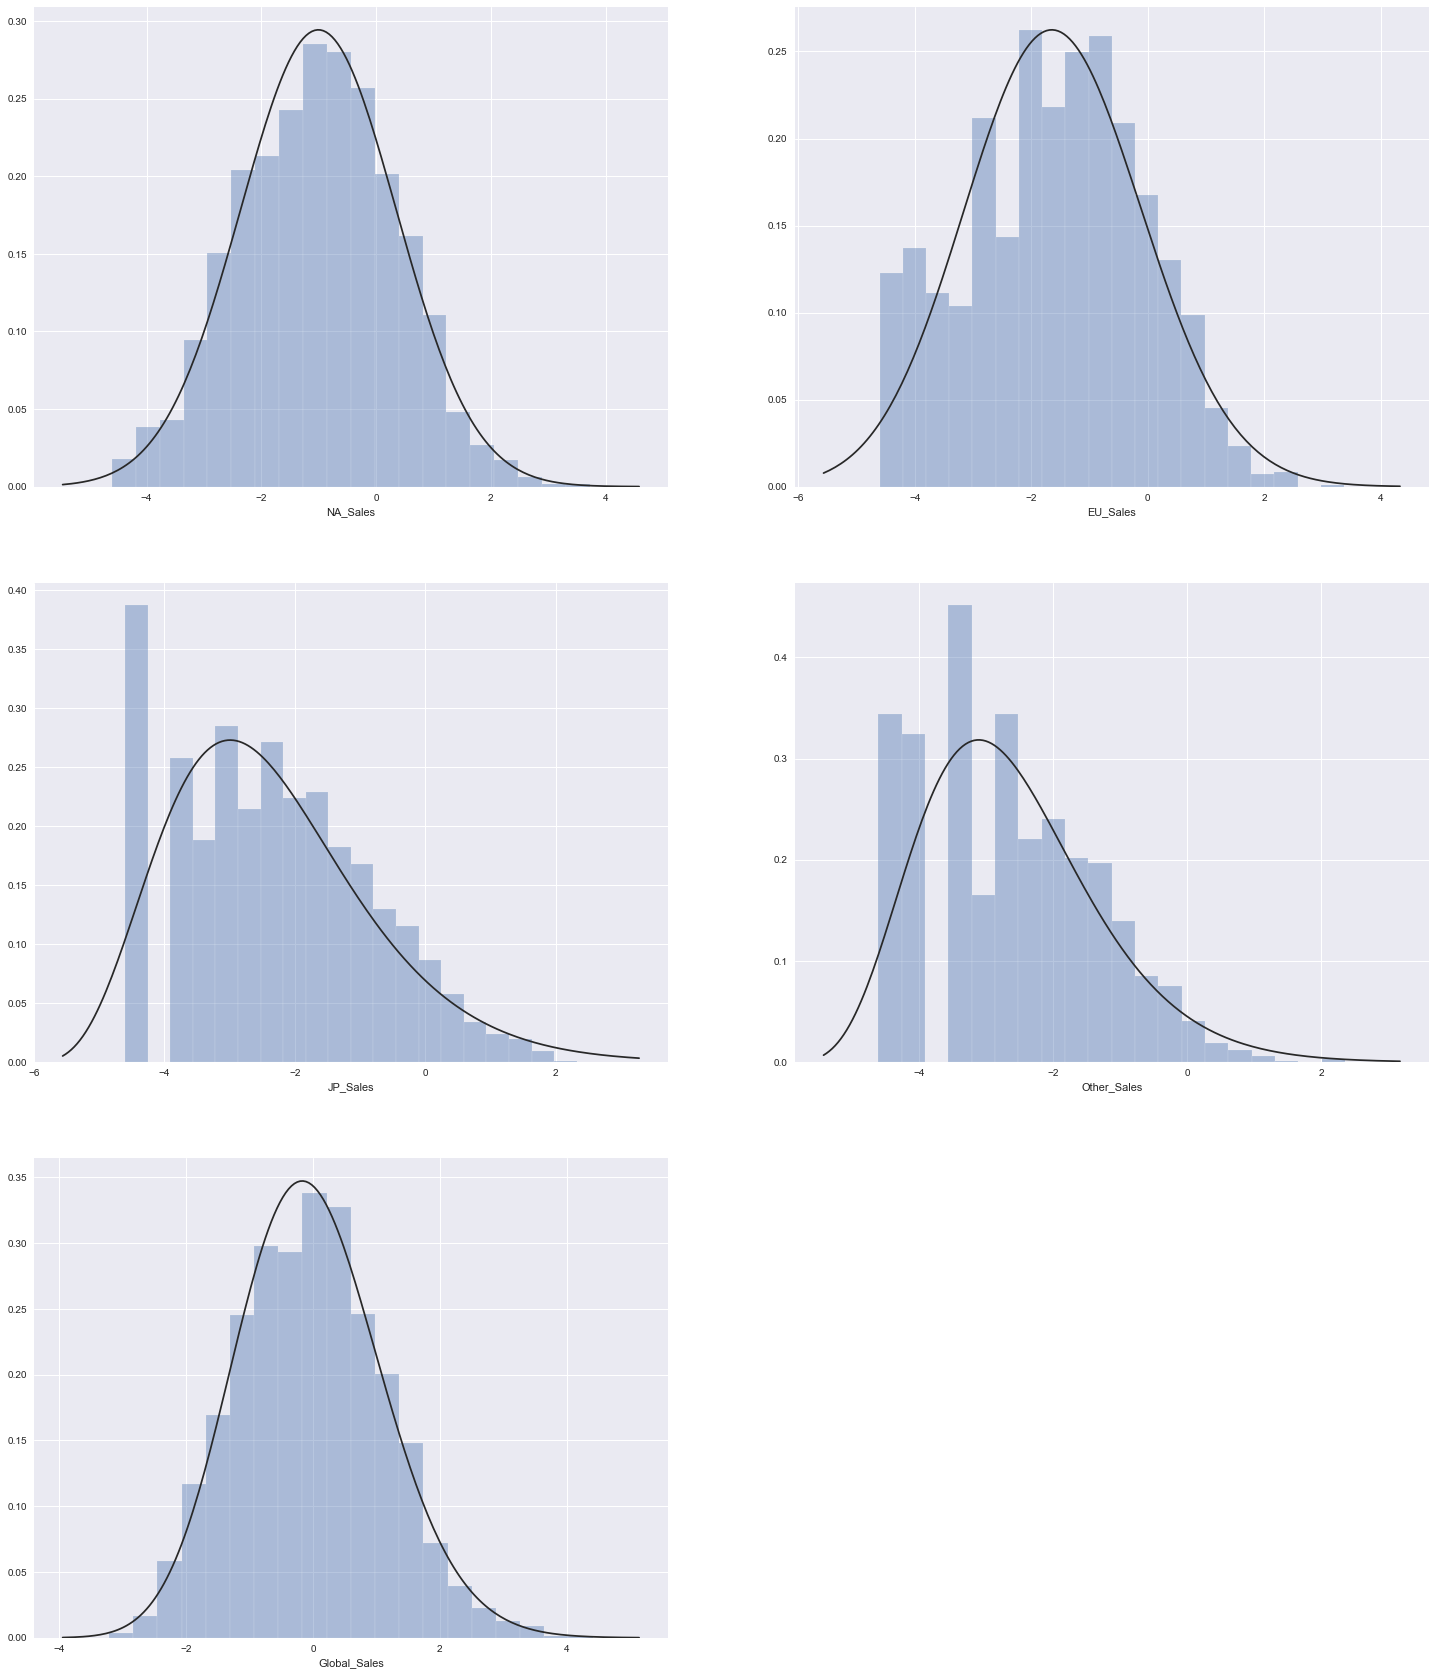

In [34]:

data_hist_log = dfSales.copy()
data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)

<AxesSubplot:>

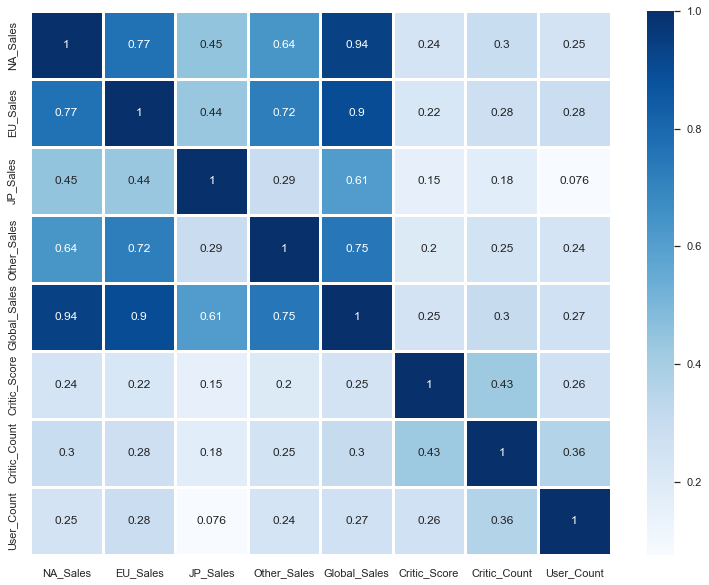

In [24]:
# Relations of columns
plt.figure(figsize=(13,10))
sns.heatmap(dfSales.corr(), cmap = "Blues", annot=True, linewidth=3)

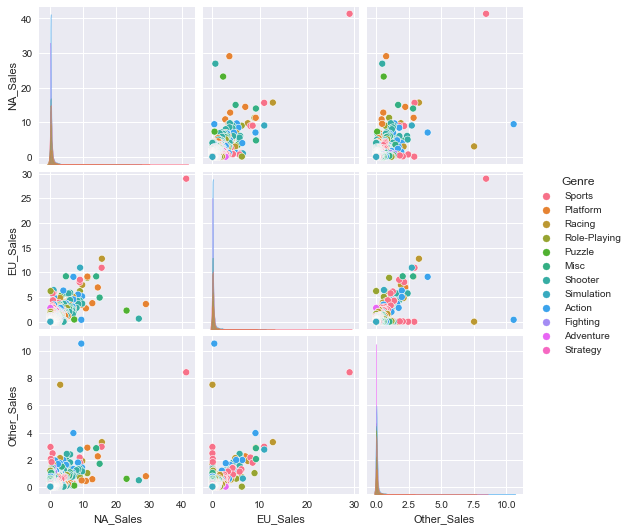

In [36]:
#pair plot 
data_pair = dfSales.loc[:,["Year_of_Release","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair
sns.pairplot(data_pair, hue='Genre')

In [ ]:
#Log Work

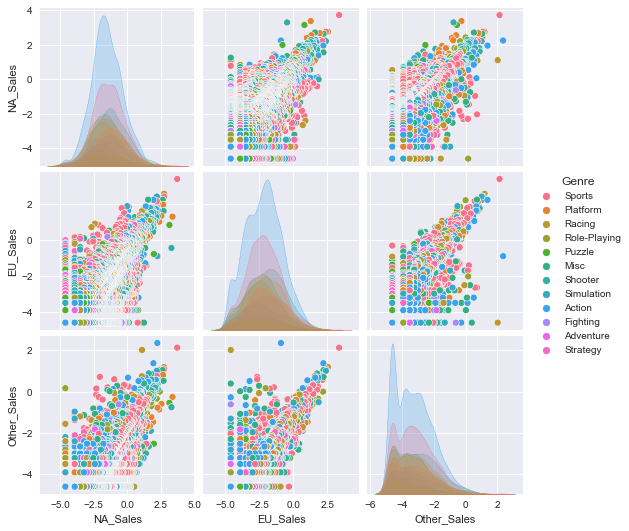

In [37]:
data_pair_log = data_pair.copy()
sale_columns = ['NA_Sales', 'EU_Sales', 'Other_Sales']
data_pair_log = data_pair_log[data_pair_log.NA_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.EU_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.Other_Sales != 0]
data_pair_log
data_pair_log['NA_Sales'] = np.log(data_pair_log['NA_Sales']);
data_pair_log['EU_Sales'] = np.log(data_pair_log['EU_Sales']);
data_pair_log['Other_Sales'] = np.log(data_pair_log['Other_Sales']);
sns.pairplot(data_pair_log, hue='Genre',  palette="husl")

#  Data Science dfGD :)

In [38]:
dfGD

,name,platform,r-date,score,user score,developer,genre,players,critics,users
0,The Legend of Zelda: Ocarina of Time,Nintendo64,"November 23, 1998",99,9.1,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647
2,Grand Theft Auto IV,PlayStation3,"April 29, 2008",98,7.6,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806
3,SoulCalibur,Dreamcast,"September 8, 1999",98,8.5,Namco,"Action,Fighting,3D",1-2,24,324
4,Grand Theft Auto IV,Xbox360,"April 29, 2008",98,7.9,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364
...,...,...,...,...,...,...,...,...,...,...
17939,Vroom in the Night Sky,Switch,"April 5, 2017",17,3.1,Poisoft,"Sports,Individual,Biking",No Online Multiplayer,15,105
17940,Leisure Suit Larry: Box Office Bust,PlayStation3,"May 5, 2009",17,1.9,Team17,"Action Adventure,Adventure,Third-Person,Open-W...",No Online Multiplayer,11,45
17941,Yaris,Xbox360,"October 10, 2007",17,4.3,BackboneEntertainment,"Driving,Racing,Arcade,Arcade,Automobile",2 Online,7,129
17942,Ride to Hell: Retribution,PC,"June 24, 2013",16,1.3,"Eutechnyx,DeepSilver","Driving,Modern,Racing,Motorcycle,Motocross,Mod...",No info,9,581


In [40]:
#User_Score
dfGD.columns = ["Name", "Platform","R_Date",
              "Critic_Score", "User_Score","Developer",
              "Genre","No_Players","Critic_Count",
              "User_Count"]
dfGD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17944 entries, 0 to 17943
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          17944 non-null  object
 1   Platform      17944 non-null  object
 2   R_Date        17944 non-null  object
 3   Critic_Score  17944 non-null  int64 
 4   User_Score    17944 non-null  object
 5   Developer     17944 non-null  object
 6   Genre         17944 non-null  object
 7   No_Players    17922 non-null  object
 8   Critic_Count  17944 non-null  int64 
 9   User_Count    17944 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.4+ MB


## PDF Generator 

In [ ]:
!pip install fpdf
!pip install pandas numpy matplotlib
!pip install plotly
!pip install -U kaleido

In [ ]:
# Python libraries
from fpdf import FPDF
from datetime import datetime, timedelta
import os

In [ ]:
fig.update_layout(margin=dict(l=0, r=0, t=70, b=0), title={"font": {"size": 20}, "x":0.5},)
fig.write_image("hust.png",engine='kaleido')

In [ ]:
WIDTH = 210
HEIGHT = 297

TEST_DATE = "5/23/22"

def create_title(day, pdf):
  pdf.set_font('Arial', '', 24)  
  pdf.ln(40)
  pdf.write(5, f"Steam Stats Analytics Report")
  pdf.ln(8)
  pdf.set_font('Arial', '', 16)
  pdf.write(4, f'{day}')
  pdf.ln(5)
  pdf.write(4, "Ian Doshner Galland")  
  pdf.ln(5)
  pdf.write(4, "Bernardo Gonzalez Herrera ")  
  pdf.ln(5)

In [ ]:
def create_analytics_report(day=TEST_DATE, filename="report.pdf"):
    pdf = FPDF() # A4 (210 by 297 mm)
    ''' First Page '''
    pdf.add_page()
    pdf.image("./resources/HeadCrop.png", 0, 0, WIDTH)
    create_title(day, pdf)
    ''' Second Page '''
    pdf.add_page()
    ''' Final Page '''
    pdf.add_page()
    pdf.image("./resources/footCrop.png", 0, 263, WIDTH)
    pdf.output(filename, 'F')


In [ ]:
if __name__ == '__main__':
  yesterday = (datetime.today() - timedelta(days=1)).strftime("%m/%d/%y").replace("/0","/").lstrip("0")
  yesterday = "5/23/22" # Uncomment line for testing
  
  create_analytics_report(yesterday)